In [1]:
from random import *
from itertools import combinations


def minConflicts(constraints, maxIter, numWizards):
    currentState = [[False for x in range(numWizards)] for y in range(numWizards)] #matrix of current booleans
    for r in range(numWizards):
        for c in range(r):
            currentState[r][c]=True #possibly might change this to linearized index
    prevConflicts = 0
    for i in range(maxIter):
        conflicts = numberConflicting(currentState, constraints)
        if conflicts == 0:
            print("SATISFIED", i)
            return currentState, i
        maxResolve = 0
        maxRow = -1
        maxCol = -1
        if conflicts - prevConflicts == 0:
#             print(conflicts)
#             print("kick")
            currentState = kick(currentState)
        else:
            for r in range(numWizards):
                for c in range(r):
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
                    newConflicts = numberConflicting(currentState, constraints)
                    if conflicts - newConflicts > maxResolve:
                        maxResolve = conflicts - newConflicts
                        maxRow = r
                        maxCol = c
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
            
            currentState[maxRow][maxCol] = not currentState[maxRow][maxCol]
            currentState[maxCol][maxRow] = not currentState[maxCol][maxRow]
        prevConflicts = conflicts
    print("GIVEN UP after", maxIter, "iterations")
    return currentState, maxIter

def kick(currentState):
    num_wizards = len(currentState)
    for i in range(num_wizards//7):
        r = int(random()*num_wizards)
        c = int(random()*num_wizards)
        currentState[r][c] = not currentState[r][c]
        currentState[c][r] = not currentState[c][r]
    return currentState

def numberConflicting(currentState, constraints):
    conflicts = 0
    for c in constraints:
        if isConflicting(currentState, c):
            conflicts += 1
    return conflicts
        
def isConflicting(currentState, c):
    return not ((currentState[c[2]][c[0]] and currentState[c[2]][c[1]]) 
            or (currentState[c[0]][c[2]] and currentState[c[1]][c[2]]) )

def prettyPrint(a):
    for r in range (len(a)):
            print(a[r])

import matplotlib.pyplot as plt

from random import shuffle, sample
from itertools import combinations

def make_ordering(n):
    """Generates a random ordering of n wizards, returned as a
    shuffled list containing the elements 0, 1, ..., n-1"""
    order = list(range(n))
    shuffle(order)
    return order

def make_constraints(order, num_constraints=500):
    """Randomly generates constraints on the wizards' ordering,
    where a constraint [a b c] means c is not between a and b."""
    combos = []
    
    for i in range(len(order)):
        for j in range(i + 1, len(order)):
            for k in range(0, i):
                combos.append((order[i], order[j], order[k]))
            for k in range(j + 1, len(order)):
                combos.append((order[i], order[j], order[k]))
    return sample(combos, num_constraints)

In [42]:
import json

numWizards = ['20','35','50']

n_samples = 5

MAX_ITER = 60000

runs={}

for j in range (3):
    for i in range(3):
        if i == 2:
            i+=1
        runs[j*10+i]=[]
        wizards = numWizards[j]
        version = str(i)
        fileName = 'failure-Andrew-' + wizards +'-'+version+ '.txt'
        print(fileName)
        with open(fileName) as data_file:
            data = json.load(data_file)
        constraints=data[1]

        print("----------------")
        print("constraint count", len(constraints))

        for k in range(n_samples):
            print()
            print("sample", k)
            state, iters = minConflicts(constraints, MAX_ITER, 20)
            runs[j*10+i].append((order, constraints, state, iters))

        if j==2:
            break
        


failure-Andrew-20-0.txt
----------------
constraint count 200

sample 0


KeyboardInterrupt: 

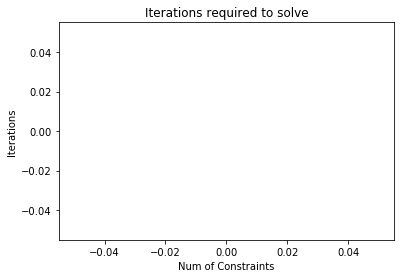


0 constraints


ZeroDivisionError: division by zero

In [41]:
# PLOTTING
xs, ys = [], []

for k, v in runs.items():
    for result in v:
        xs.append(k)
        ys.append(result[3])
plt.title("Iterations required to solve")
plt.xlabel("Num of Constraints")
plt.ylabel("Iterations")
plt.scatter(xs, ys)
plt.show()

for k, v in runs.items():
    print()
    print(k, "constraints")
    iters_all = [result[3] for result in v]
    print("mean", sum(iters_all)/len(iters_all), "med", iters_all[len(iters_all)//2], "max", max(iters_all))
    